<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/TimeSeries_from_the_ground_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![picture](https://drive.google.com/uc?export=view&id=179Y0AoR6jKBF5CEsAxqr0JAcCuf0rN8L)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 20.7MB/s]


In [3]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [4]:
mobile_sales.dtypes

,0
DATE,datetime64[ns]
Sales,float64


In [5]:
# pd.to_datetime("column_name")


In [6]:
mobile_sales.Sales.describe()

,Sales
count,198.000000
mean,10842.757576
std,2605.006293
min,108.000000
25%,8856.000000
50%,10745.000000
75%,12399.750000
max,23740.000000


In [7]:
mobile_sales.index

RangeIndex(start=0, stop=217, step=1)

In [8]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [9]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<Axes: xlabel='DATE'>

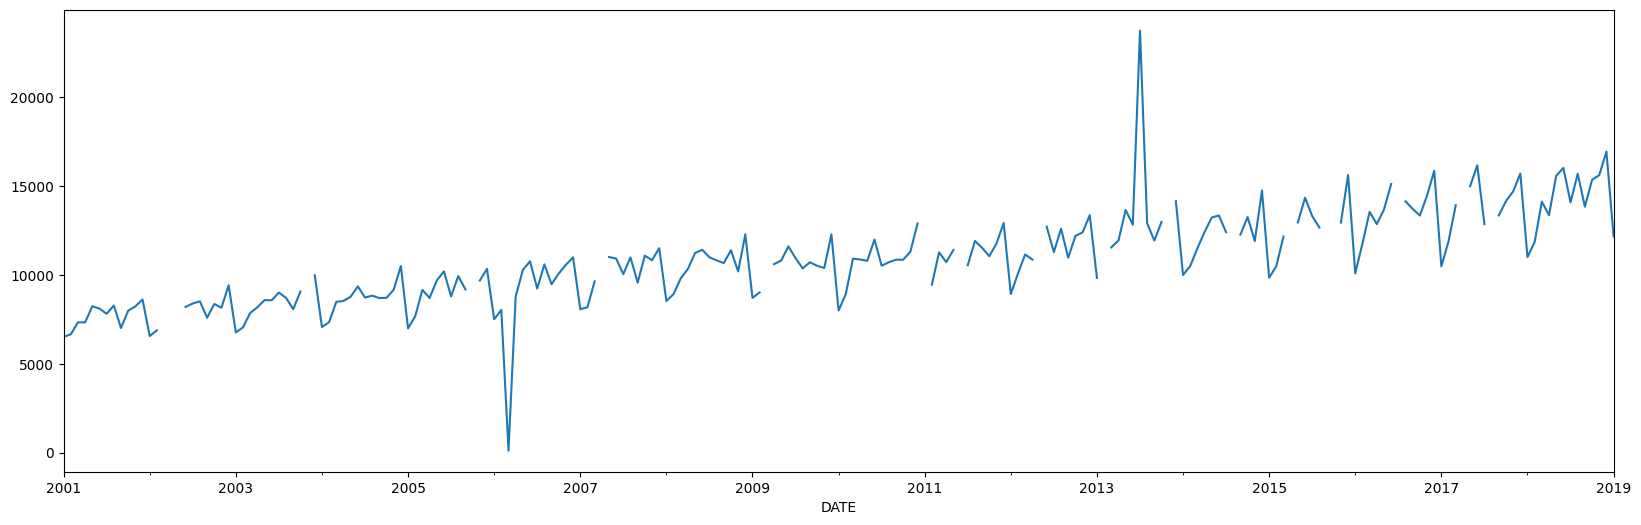

In [10]:
mobile_sales.Sales.plot()

In [11]:
mobile_sales.isna().sum()

,0
Sales,19


In [12]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


In [13]:
mobile_sales.Sales.mean()

10842.757575757576

In [14]:
mobile_sales.Sales.median()

10745.0

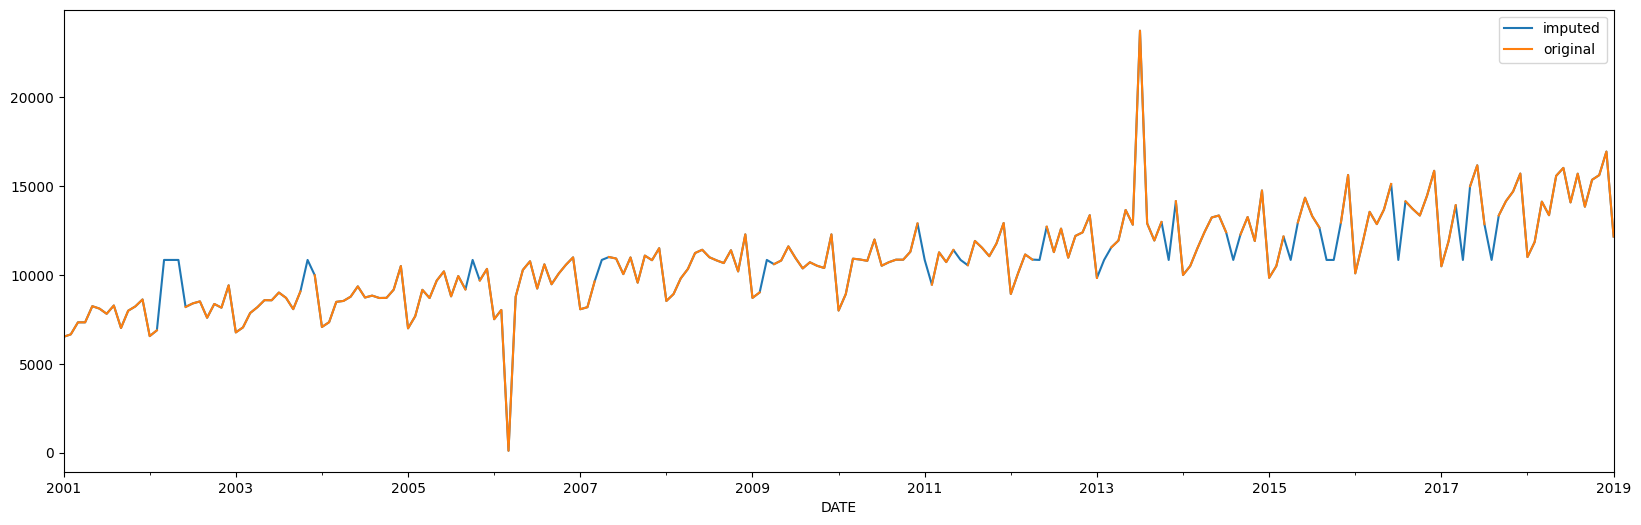

In [15]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

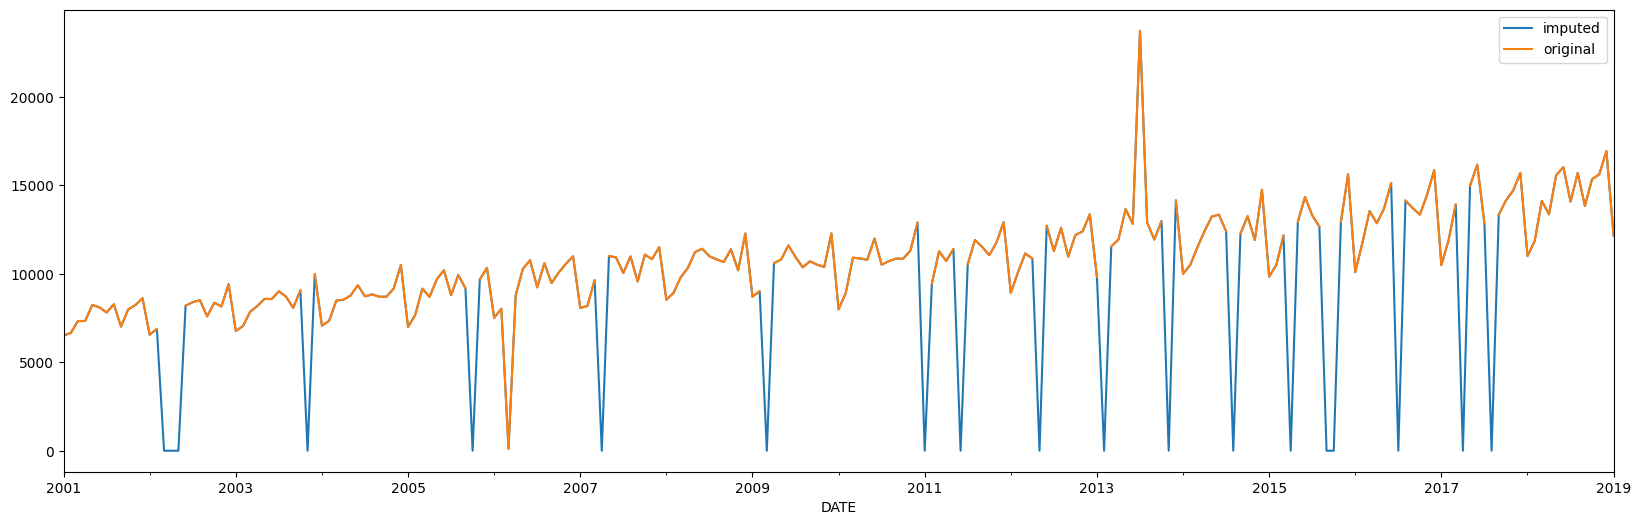

In [16]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [17]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

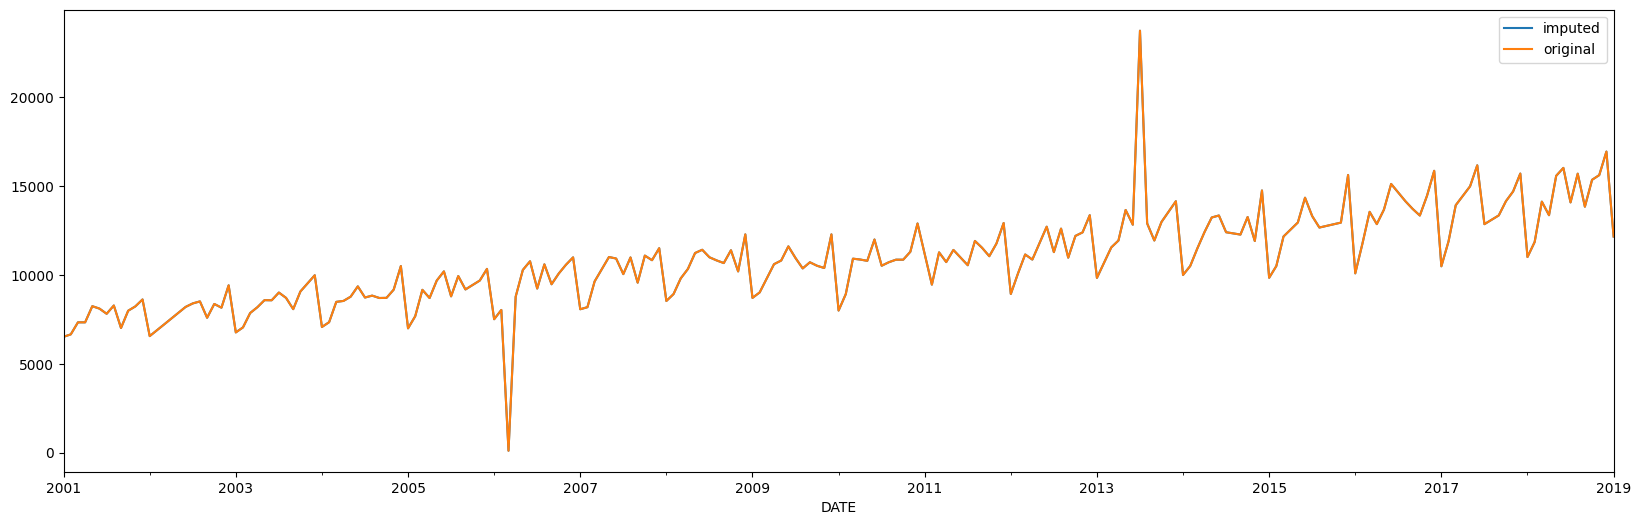

In [18]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

[]

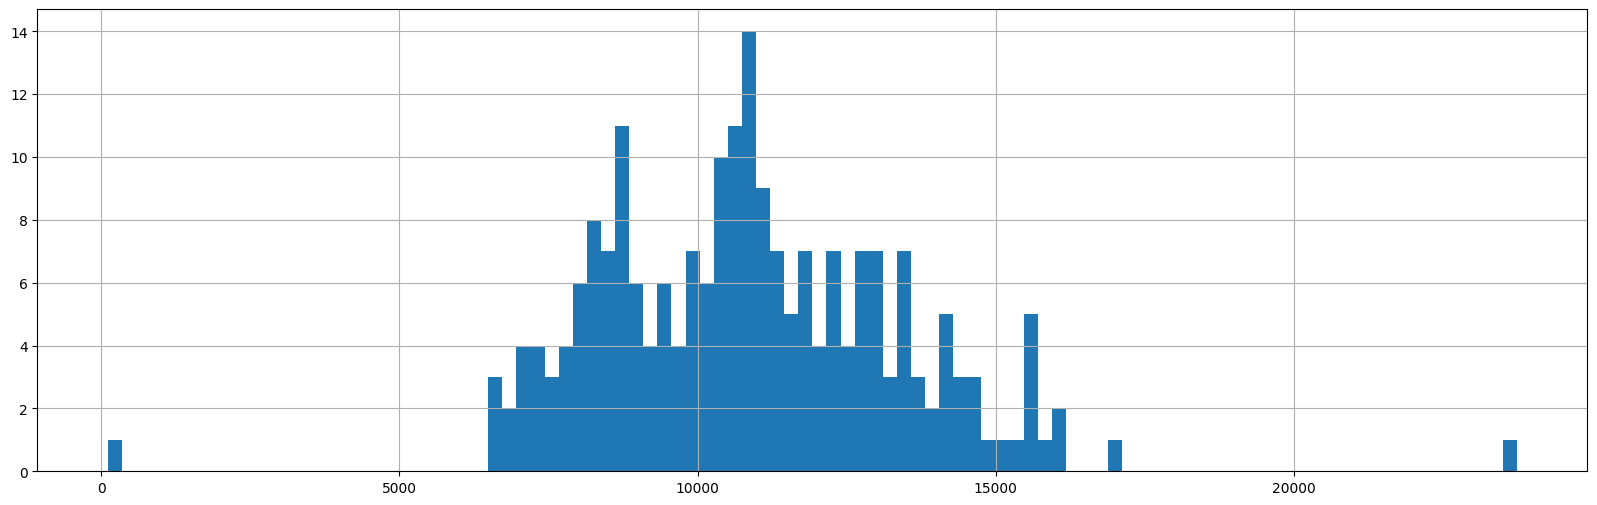

In [19]:
mobile_sales.Sales.hist(bins=100).plot()

[]

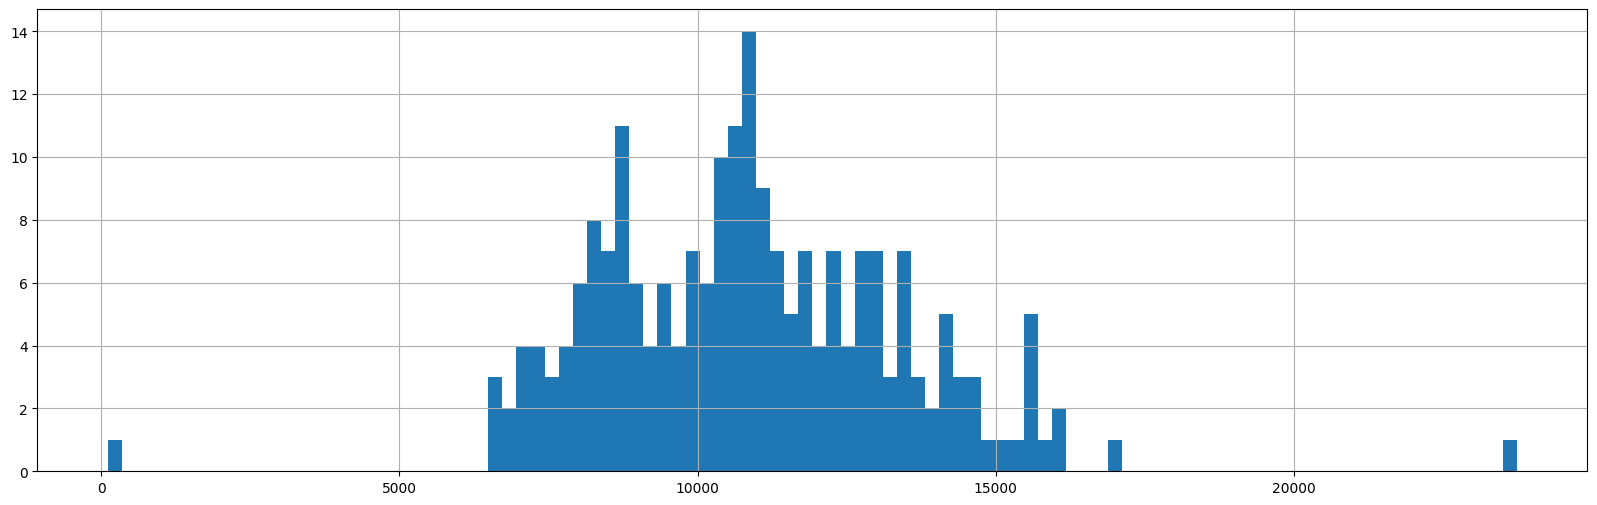

In [20]:
mobile_sales.Sales.hist(bins=100).plot()

In [21]:
mobile_sales.Sales.quantile(0.95)

15164.599999999997

<Axes: xlabel='DATE'>

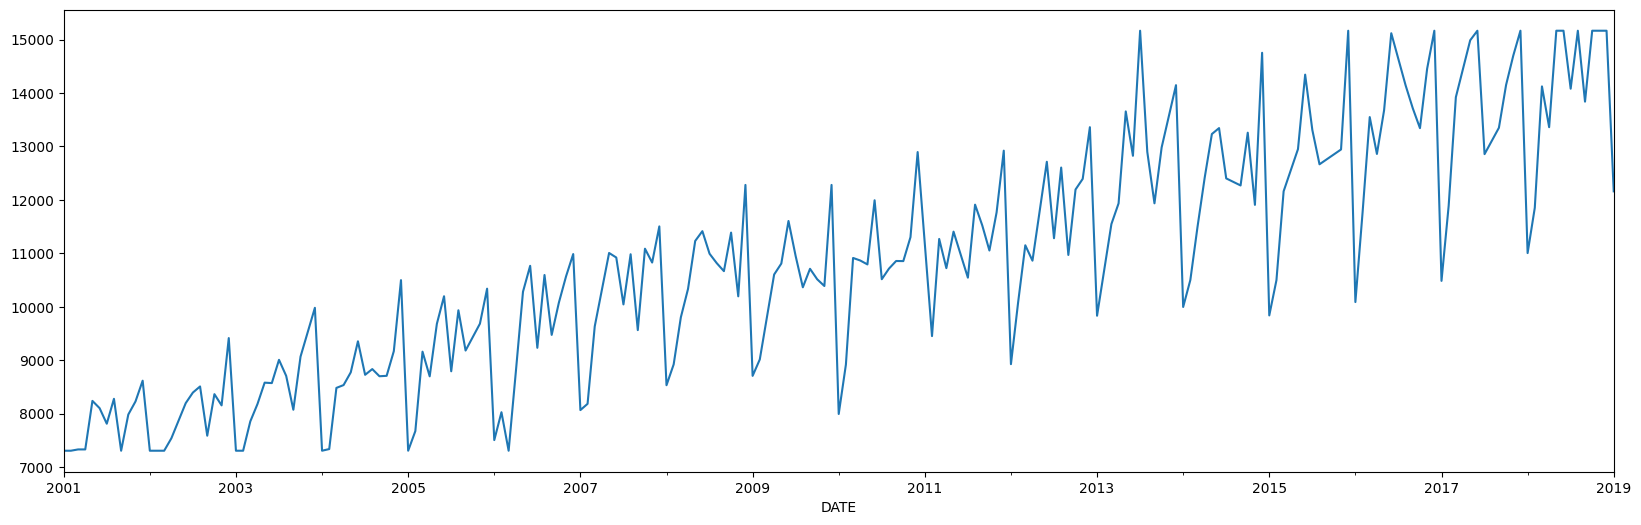

In [22]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

<Axes: xlabel='DATE'>

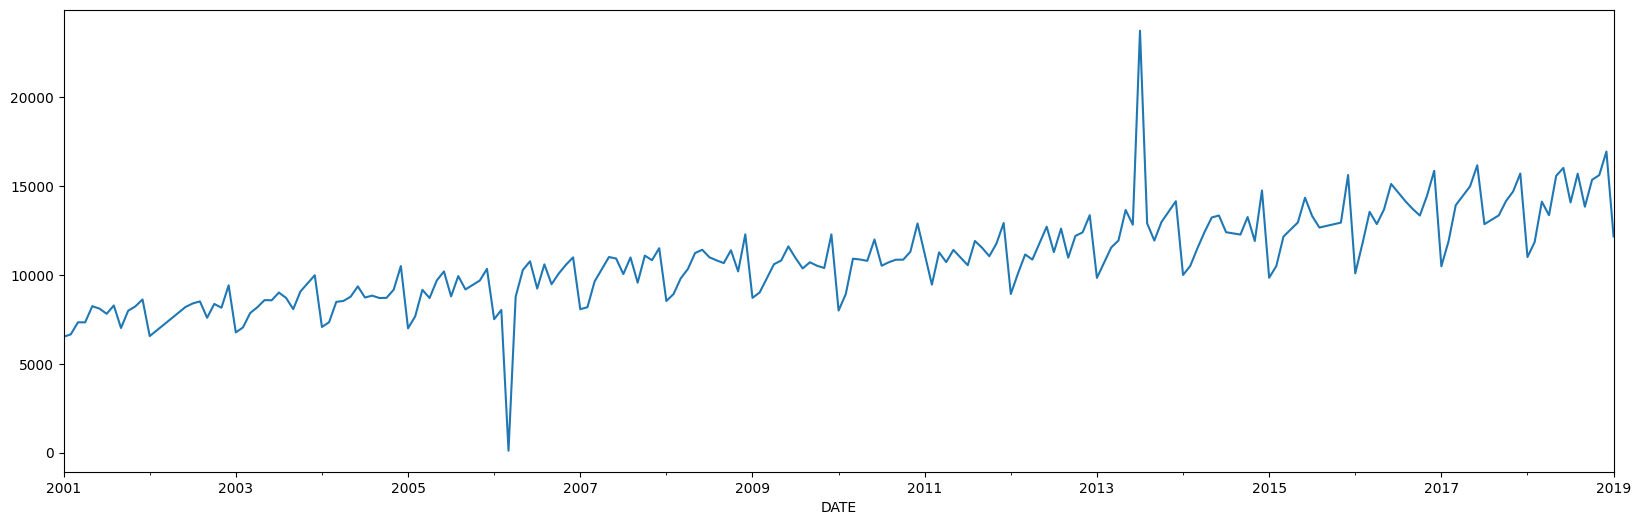

In [23]:
mobile_sales.Sales.plot()

In [24]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

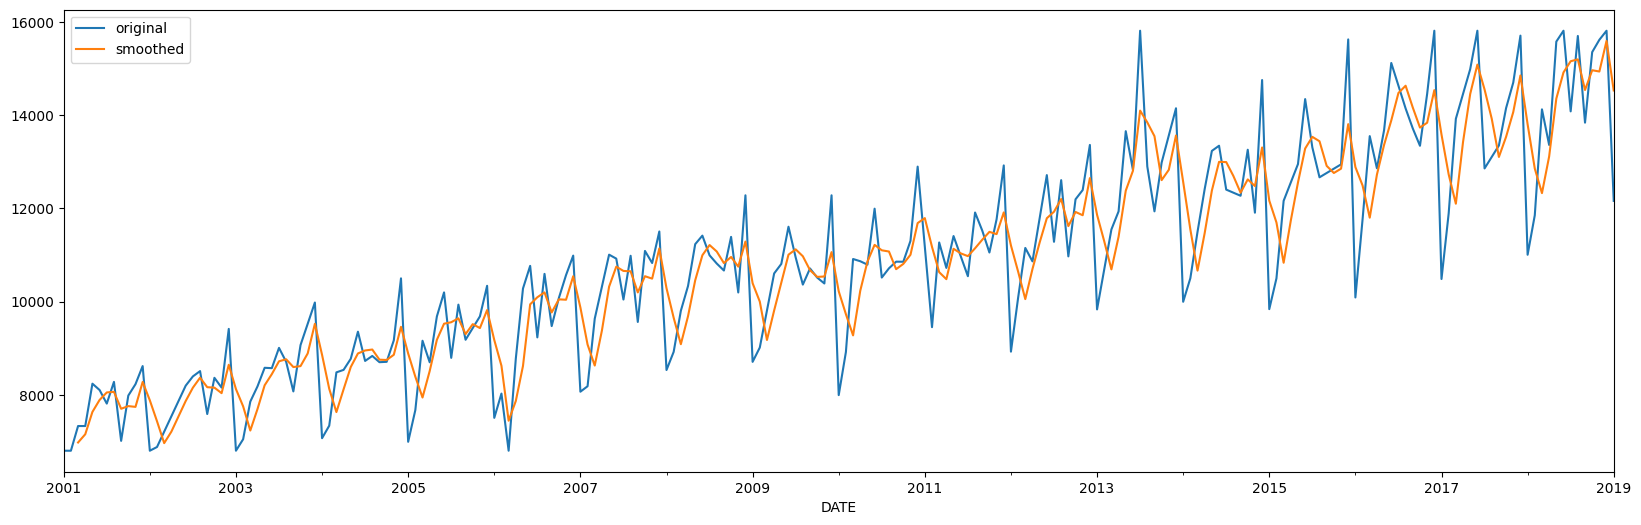

In [25]:
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(3, center=False).mean().plot(label='smoothed')

plt.legend()

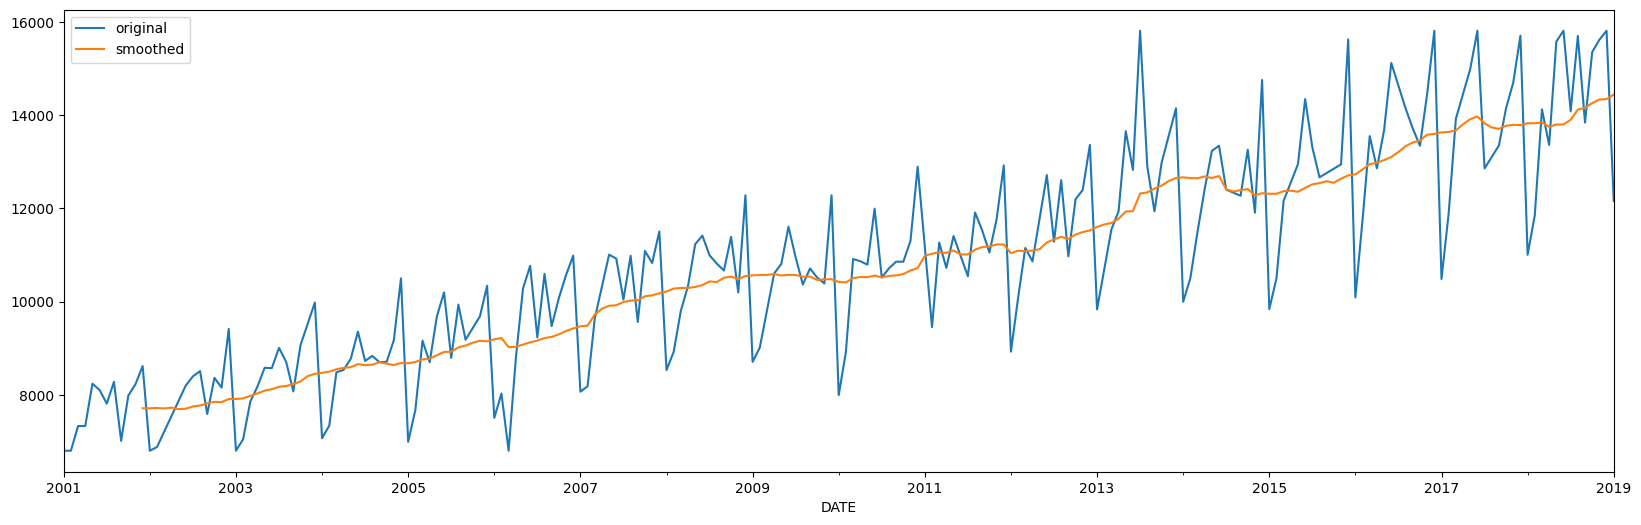

In [26]:
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed')

plt.legend()

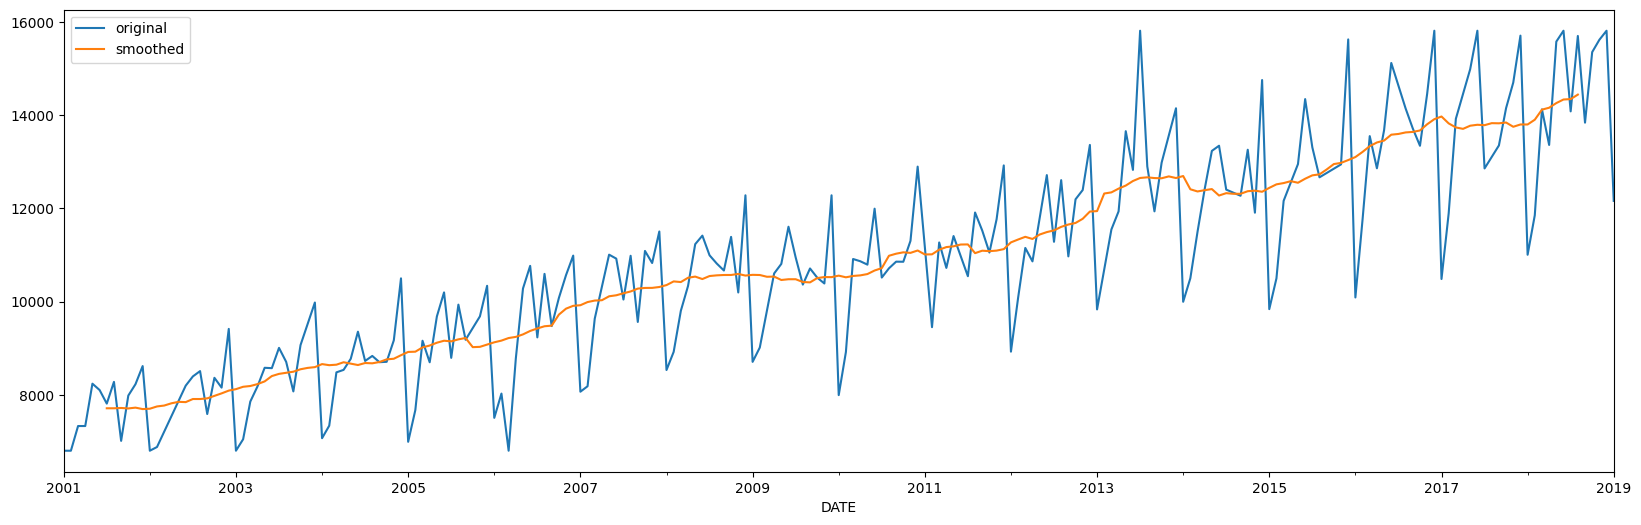

In [27]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=True).mean().plot(label='smoothed')
plt.legend()

In [28]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

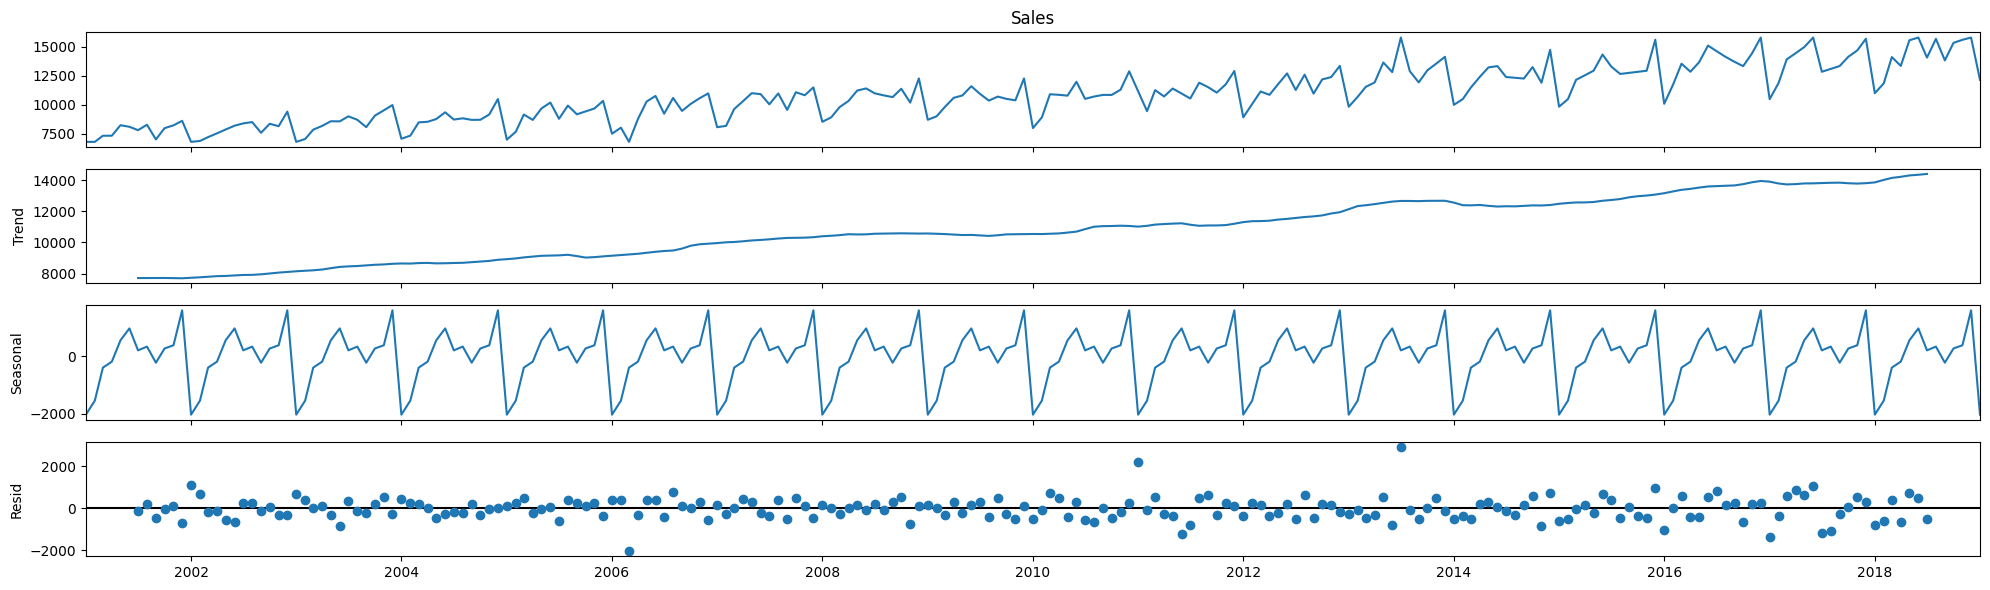

In [29]:
model.plot();

In [30]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='multiplicative')

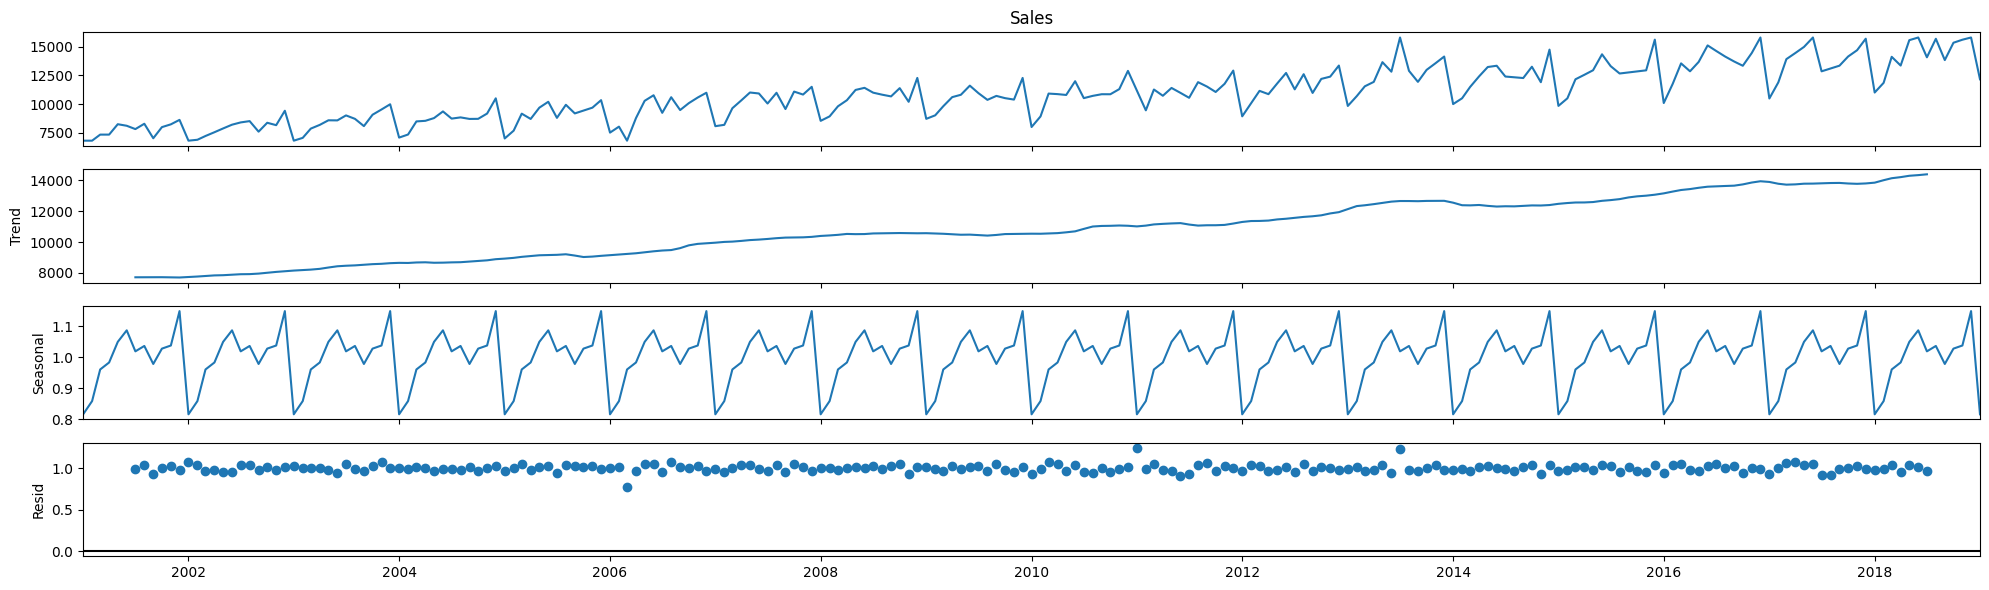

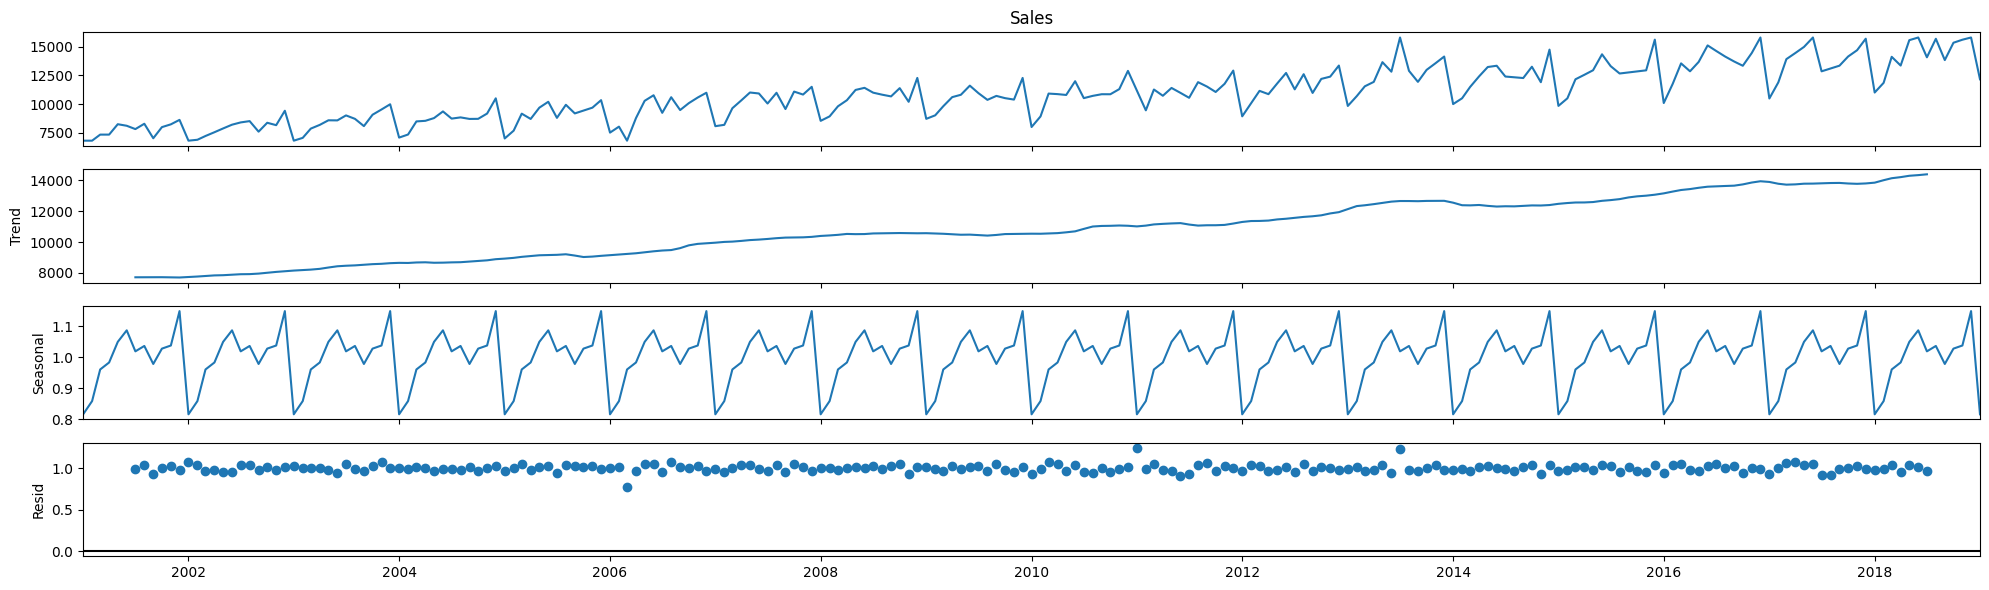

In [31]:
model.plot()

In [32]:
train_size = int(len(mobile_sales) * 0.8)


In [33]:
train_size = int(len(mobile_sales) * 0.8)
train = mobile_sales.iloc[:train_size]
test = mobile_sales.iloc[train_size:]

print("Train set:\n", train.tail())  # last few training samples
print("\nTest set:\n", test.head())  # first few testing samples

Train set:
               Sales
DATE               
2015-01-01   9839.0
2015-02-01  10499.0
2015-03-01  12161.0
2015-04-01  12555.5
2015-05-01  12950.0

Test set:
                    Sales
DATE                    
2015-06-01  14343.000000
2015-07-01  13308.000000
2015-08-01  12666.000000
2015-09-01  12758.333333
2015-10-01  12850.666667


In [34]:
train.shape

(173, 1)

In [35]:
test.shape

(44, 1)

In [36]:
mobile_sales.shape

(217, 1)